# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

# Dataset

**Load Data**

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

**Sneak-peek**

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

It is image data in a numpy array. So to see the image, we will have to use ```matplotlib```'s image visualization method (```pyplot.imshow```).

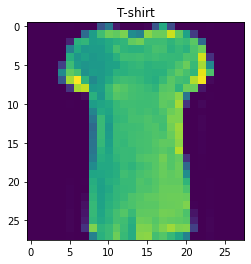

In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(x_train[321])
plt.title(class_names[y_train[321]])
plt.show()

# Data Preprocessing

Let's see an example of what the actual data look like.

In [6]:
print(x_train[69])

[[  0   0   0   0   0   0   0   0   0   0 105 170 170 170 158 146 143  86
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11 185 181 193 206 178 181 186 188
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33 195 153 160 173 160 160 155 196
   45   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  81 188 158 181 196 178 180 160 188
   85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 116 183 168 180 213 186 176 180 190
  105   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 120 171 155 165 191 173 165 165 193
  110   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 106 181 155 156 243 238 156 156 181
  110   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  76 193 146 176 141 163 198 155 195
   83   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  46 201 145 208  78 101 21

It's a 28*28 numpy array

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
print(x_train[69])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.4117647  0.6666667
  0.6666667  0.6666667  0.61960787 0.57254905 0.56078434 0.3372549
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.04313726 0.7254902  0.70980394
  0.75686276 0.80784315 0.69803923 0.70980394 0.7294118  0.7372549
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.12941177 0.7647059  0.6
  0.627451   0.6784314  0.627451   0.627451   0.60784316 0.76862746
  0.1764706  0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.3176

# Model

In [9]:
model = keras.Sequential()                              # model is now a list
model.add(keras.layers.Flatten(input_shape=(28, 28)))   # input layer
model.add(keras.layers.Dense(64, activation='relu'))    # hidden unit, 64 means there will be 64 units in this layer
model.add(keras.layers.Dense(128, activation='tanh'))
model.add(keras.layers.Dense(10, activation='softmax')) # output layer, 10 means there are 10 output classes, so there should be 10 units in the output layer

# we could also do do this in this way
# model = keras.Sequential([keras.layer.Flatten(input_shape=(28, 28)),
#                           keras.layers.Dense(64, activation='relu'),
#                           keras.layers.Dense(10, activation='softmax')
# ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5035 - accuracy: 0.8181
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3721 - accuracy: 0.8649
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3347 - accuracy: 0.8764
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3128 - accuracy: 0.8848
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2969 - accuracy: 0.8895
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2849 - accuracy: 0.8942
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2723 - accuracy: 0.8977
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2616 - accuracy: 0.9026
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2531 - accuracy: 0.9048
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2468 - accuracy: 0.9064

# Evaluation and Prediction

In [12]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 1ms/step - loss: 0.3180 - accuracy: 0.8852
[0.31795772910118103, 0.885200023651123]


In [13]:
predictions = model.predict(x_test)

In [14]:
print(predictions[69])
print(class_names[np.argmax(predictions[69])])

[7.5574508e-07 3.9864659e-10 1.7724075e-07 7.5083676e-08 3.4564653e-07
 8.2163098e-08 1.0306367e-07 1.7012328e-08 9.9999845e-01 3.9237129e-09]
Bag


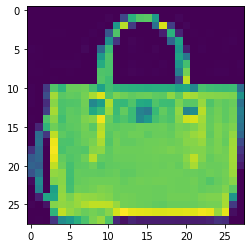

In [15]:
plt.imshow(x_test[69])
plt.show()